<center>
<h1>Факультет "Прикладная математика" МАИ</h1>
<h2>Курс "Основы Python для анализа данных"</h2>
<h2>Артамонов Игорь Михайлович</h2>
</center>

<center><h2>Занятие № 9. Основы поискового анализа данных (EDA) </h2></center>

## Общение / вопросы по курсу

Платформа для групповой работы Atlassian Confluence факультета "Прикладная математика"

https://mai.moscow/display/PYTML

* <b>Занятие № 9. Основы поискового анализа данных (EDA)</b>

## virtualenv + Jupyter notebook

```
<Ctrl> + <Alt> + T - новое окно терминала
```

```
$ conda -V

$ conda update conda

$ conda search "^python$"

$ conda create -n yourenvname python=x.x anaconda

$ source activate yourenvname

$ jupyter notebook

$ conda install -n yourenvname [package]
```

## Исследовательский анализ данных (Exploratory Data Analysis - EDA)

#### Скорее, сочетание философии с методологей
* как мы "разбираемся" с данными
* на что в данных мы смотрим
* как мы смотрим
* как интерпретируем увиденное
* не смотря на общие методы, каждый DA вырабатывает свой "стиль"

#### Обычный порядок действий
* получить и ввести датасет
* понять, какая информация содержится в датасете ("семантика")
* понять структуру данных ("синтаксис")
* что делать с пропусками (если они  есть)
* извлечь существенные переменные
* выявить выбросы и аномалии
* сделать и проверить каки-либо предположения о данных
* определить факторное пространство (что на что и как влияет)
* выполнить отчет (если он нужен)

#### Используеются
* графические средства
* отчеты и статистика
* преобразования даннных

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sc
from numpy.random import randn
import seaborn as sns
from scipy import stats

%matplotlib inline

In [3]:
import os
import os.path

## Загрузите данные с kaggle

### https://www.kaggle.com/c/house-prices-advanced-regression-techniques

* какие данные у нас есть?
* есть ли у нас описание?
* что от нас требуется?

нам нужны тренировочные и тестовые данные: 
* __train.csv__
* __test.csv__

In [55]:
data_dir = os.path.join("datasets/titanic")
train = pd.read_csv(os.path.join(data_dir, "train.csv"))
test = pd.read_csv( os.path.join(data_dir, "test.csv"))

In [56]:
train.shape

(891, 12)

In [57]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [58]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [60]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [61]:
train['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [62]:
train = train.fillna(value={'Cabin': 'N'})
train['Cabin'] = train.apply(lambda row: row['Cabin'][0], axis=1)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,N,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,N,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,N,S


## <font color=red>ЗАДАНИЕ</font>

Разделите датафрейм на 2. 
* Создайте копию исходго датафрейма (__для чего?__)
* В первом __X_train__  - должны остаться все переменные, кроме целевой. 
* Во втором __y_train__ - только целевая переменная.


In [63]:
# Ваш код
y_train = train['Survived']
X_train = train.copy().drop(['Survived'], axis=1)

In [64]:
X_train.shape, y_train.shape

((891, 11), (891,))

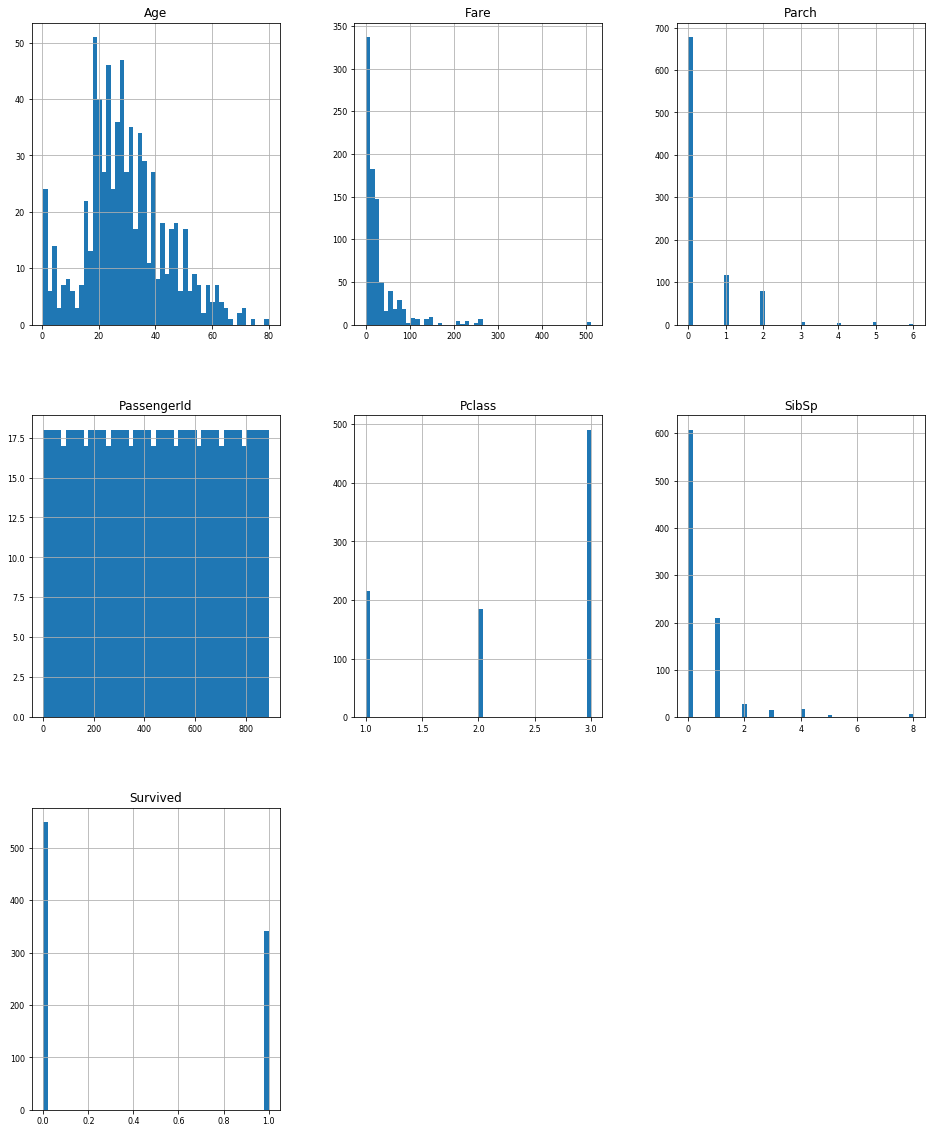

In [65]:
train.hist(figsize=(16,20), bins=50, xlabelsize=8, ylabelsize=8);

#### * Какие графики наиболее подозрительны на выбросы и почему?
#### * Постройте графики для каждой из них 

In [11]:
# Ваш код

#X_train['3SsnPorch'].hist()


In [26]:
#X_train['LotFrontage'].hist()

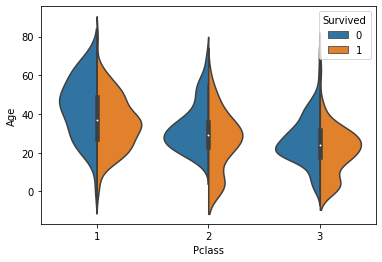

In [66]:
sns.violinplot("Pclass", "Age", hue='Survived', data=train, split=True)

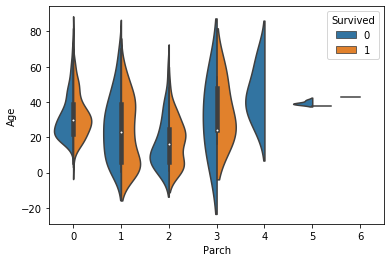

In [67]:
sns.violinplot("Parch", "Age", hue='Survived', data=train, split=True)

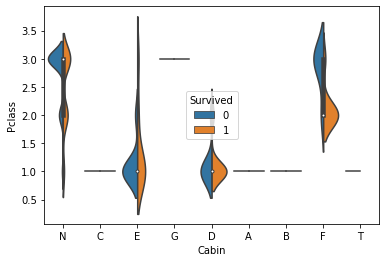

In [69]:
sns.violinplot("Cabin", "Pclass", hue='Survived', data=train, split=True)

### <font color=green>ВОПРОСЫ</font>
* Где здесь выбросы?
* Что с ними можно сделать

### <font color=green>ВОПРОС.</font> Остались ли ещё выбросы?

#### <font color=green>ВОПРОС.</font>  Что можно сделать с этим? Остались ли ещё выбросы?

/home/rk/source/repos/maga/sem01/python/venv/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/rk/source/repos/maga/sem01/python/venv/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


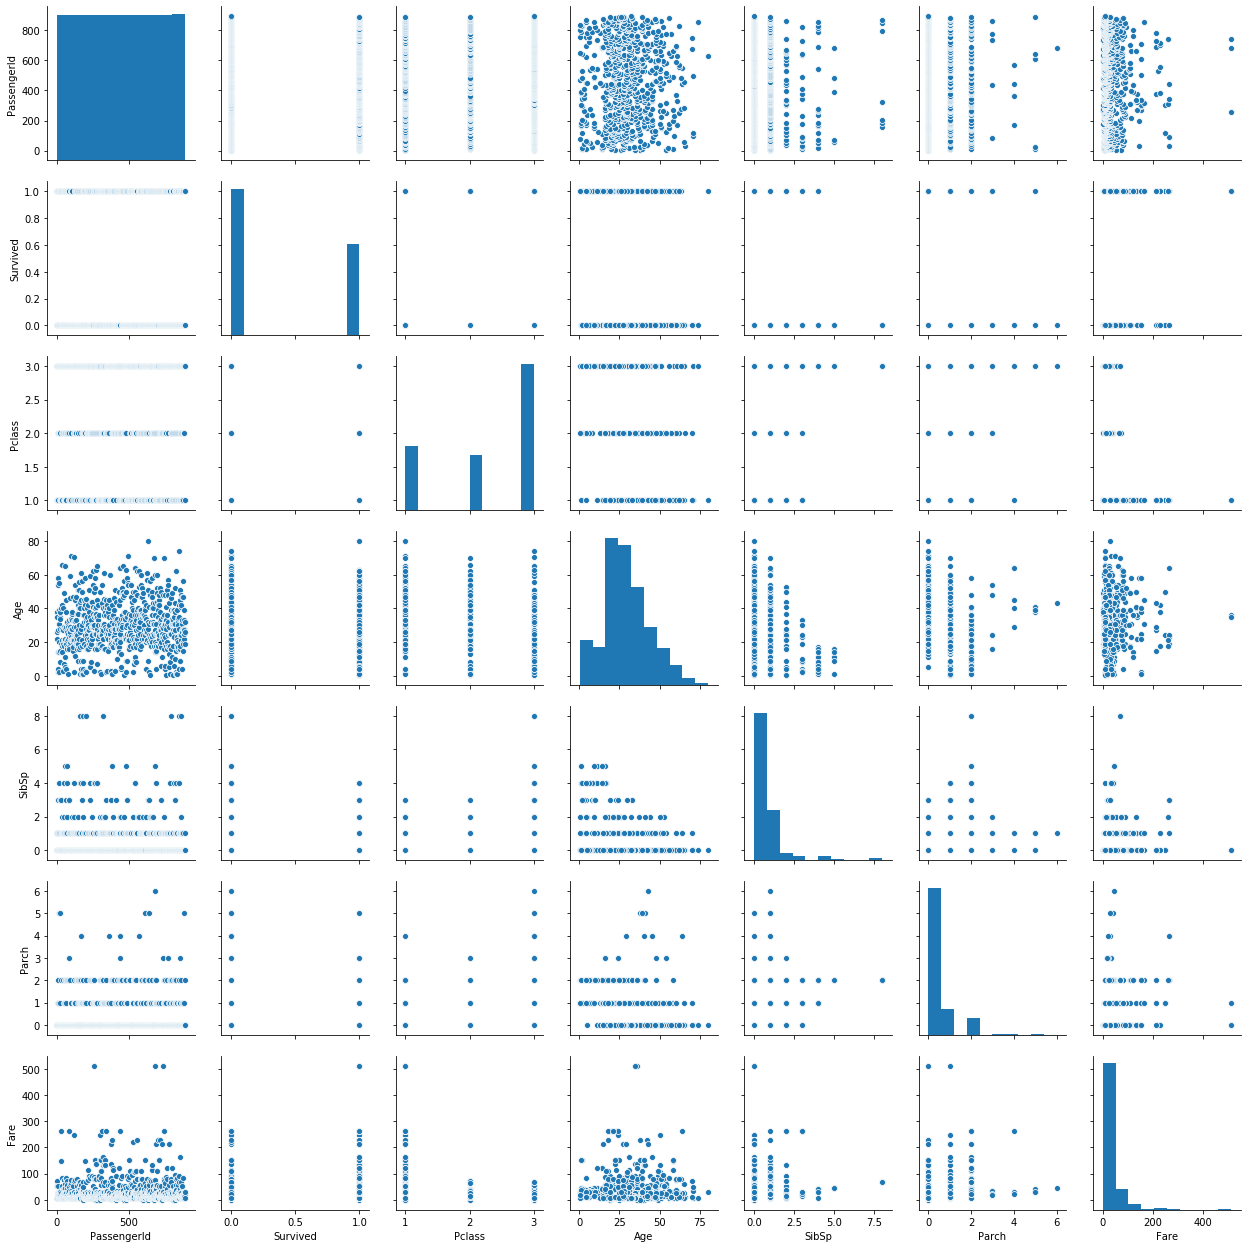

In [28]:
columns = train.columns

#pd.plotting.scatter_matrix(train[columns],figsize=(12,12));
#pt.figure();
sns.pairplot(train)

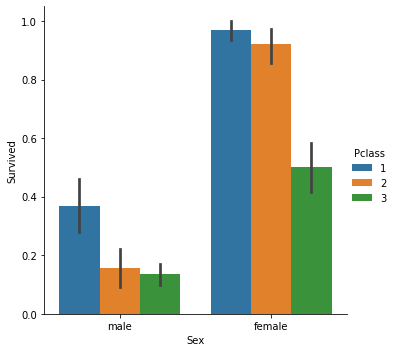

In [34]:
sns.catplot(x="Sex", y="Survived", hue="Pclass", kind="bar", data=train);

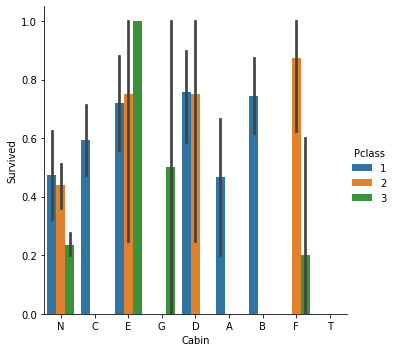

In [70]:
sns.catplot(x="Cabin", y="Survived", hue="Pclass", kind="bar", data=train);

#### Более удобочитаемый вариант 

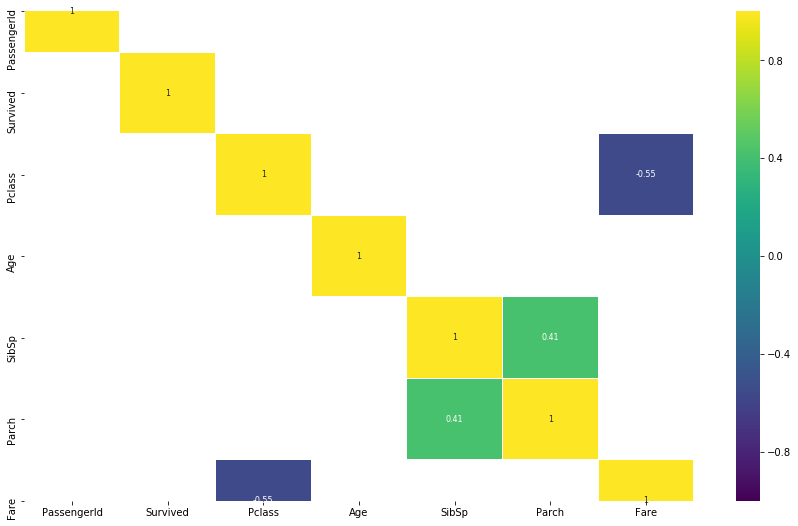

In [71]:
corrmat = train.corr()
plt.subplots(figsize=(15,9))
sns.heatmap(corrmat[(corrmat >= 0.4) | (corrmat < -0.4)], 
            cmap='viridis',
            vmax=1.0, vmin=-1.0,
            linewidth=0.1,
            annot=True,
            annot_kws={"size":8});

### Фильтрация пропущенных данных

In [36]:
all_data["PoolQC"] = all_data["PoolQC"].fillna("None")

In [37]:
all_data["MiscFeature"] = all_data["MiscFeature"].fillna("None")

In [38]:
all_data["Alley"] = all_data["Alley"].fillna("None")

In [39]:
all_data["Fence"] = all_data["Fence"].fillna("None")

In [40]:
all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("None")

In [41]:
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

In [42]:
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col] = all_data[col].fillna('None')

In [43]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)

In [44]:
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)

In [45]:
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')

In [46]:
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)

In [47]:
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])

#### <font color=green>ВОПРОС.</font>  Почему? Что делает mode()?

In [48]:
all_data = all_data.drop(['Utilities'], axis=1)

#### <font color=green>ВОПРОС.</font>  Почему?

In [49]:
all_data["Functional"] = all_data["Functional"].fillna("Typ")

In [50]:
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])

In [51]:
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])

In [52]:
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])

In [53]:
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])

In [54]:
all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")

### Проверяем, остались ли не заполненные данные?

In [55]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()

,Missing Ratio


#### <font color=green>ВОПРОС.</font>  Какие численные значения можно преобразовать в категориальные?

In [56]:
from sklearn.preprocessing import LabelEncoder

cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder()
    lbl.fit(list(all_data[c].values)) 
    all_data[c] = lbl.transform(list(all_data[c].values))

# shape        
print('Shape all_data: {}'.format(all_data.shape))

Shape all_data: (2917, 79)


#### <font color=green>ВОПРОС.</font>  Можно ли найти сложные / составные признаки?

In [57]:
# Adding total sqfootage feature 
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

### Признаки со смещенным распределением

In [58]:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = all_data[numeric_feats].apply(lambda x: stats.skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
MiscVal,21.939672
PoolArea,17.688664
LotArea,13.109495
LowQualFinSF,12.084539
3SsnPorch,11.372080
LandSlope,4.973254
KitchenAbvGr,4.300550
BsmtFinSF2,4.144503
EnclosedPorch,4.002344
ScreenPorch,3.945101


In [59]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    all_data[feat] = boxcox1p(all_data[feat], lam)
    
#all_data[skewed_features] = np.log1p(all_data[skewed_features])

There are 60 skewed numerical features to Box Cox transform


In [60]:
all_data = pd.get_dummies(all_data)
print(all_data.shape)

(2917, 221)


In [61]:
all_data.columns

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'Alley', 'BedroomAbvGr',
       'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtFinType1',
       ...
       'SaleCondition_Partial', 'SaleType_COD', 'SaleType_CWD', 'SaleType_Con',
       'SaleType_ConLD', 'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New',
       'SaleType_Oth', 'SaleType_WD'],
      dtype='object', length=221)

In [62]:
train = all_data[:ntrain]
test = all_data[ntrain:]

### Рекомендуется посмотреть

https://www.kaggle.com/mjbahmani/machine-learning-workflow-for-house-prices

## <font color="blue">Практическое задание</font>

 www.kaggle.com/c/titanic

Выполните EDA <b>по приведенному ранее образцу</b> для данного датасета. Перед каждой ячейкой должен быть комментарий в строке типа Makrdown, 
говорящей, что выполняется и почему.

## Экзаменационные вопросы:

* EDA, её назначение и типовая структура